Win/Loss Ratio:
Wins: 152, Losses: 323, Total: 475
Win Rate: 32.00%


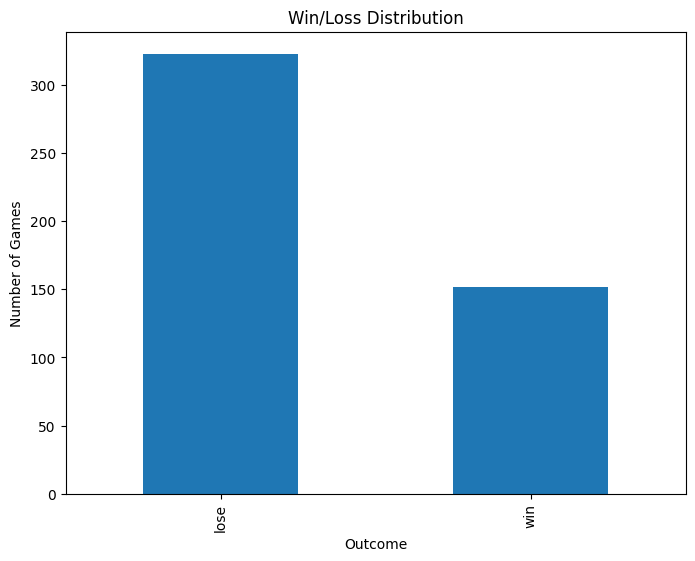

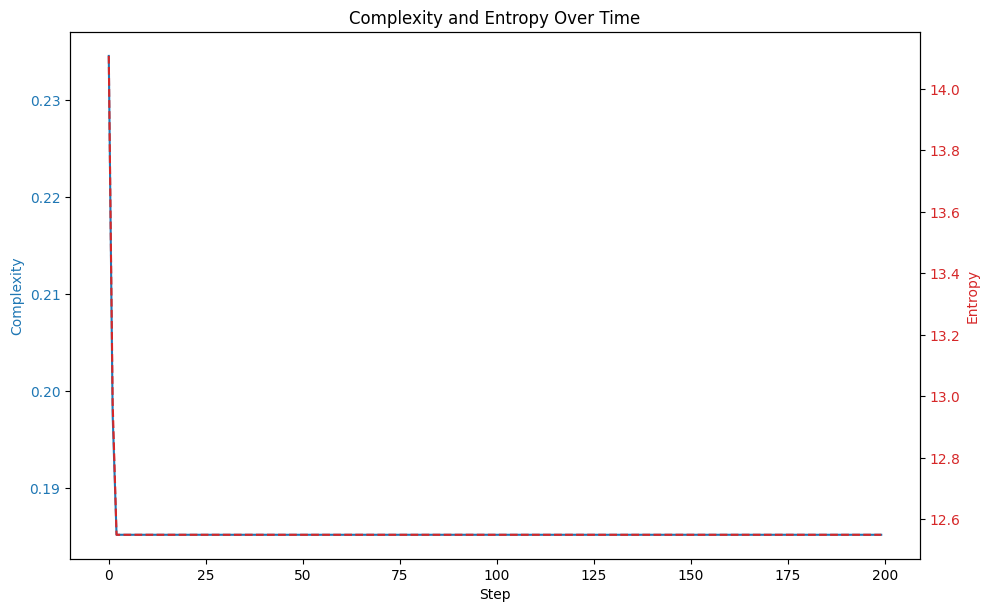

Entropy at start: 14.11
Entropy at end: 12.55
Entropy decreased over time, indicating increased certainty.


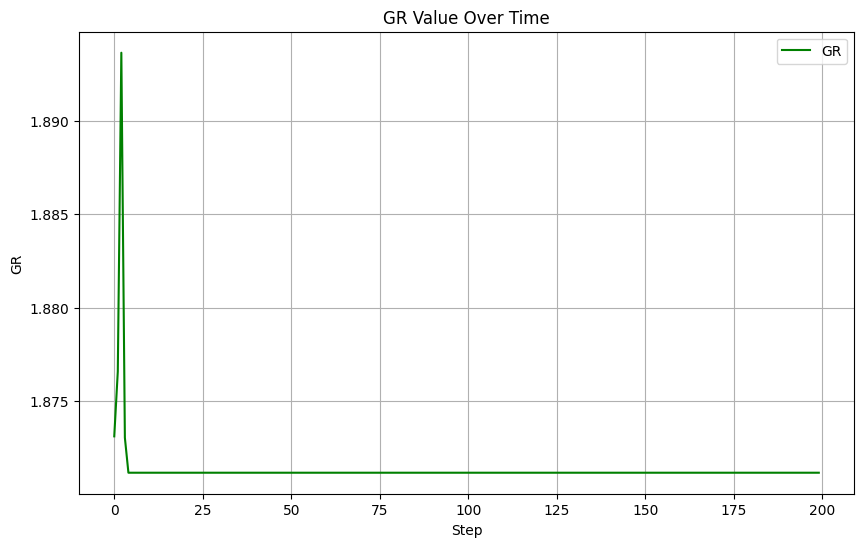

No large sudden GR changes detected.

Summary Statistics:
   Initial_Complexity  Final_Complexity  Initial_Entropy  Final_Entropy  \
0            0.234568          0.185185        14.107264      12.549611   

    Mean_GR    Max_GR    Min_GR  Win_Count  Loss_Count  Win_Rate  
0  1.871336  1.893632  1.871177        152         323      32.0  

Step-by-Step Analysis (First 10 rows):
   Game_ID  Step  Action  Row  Column
0        1     1  reveal    1       1
1        2     1  reveal    1       1
2        2     2  reveal    2       1
3        3     1  reveal    1       1
4        4     1  reveal    1       1
5        4     2  reveal    2       1
6        4     3  reveal    1       2
7        4     4  reveal    0       3
8        4     5  reveal    3       0
9        4     6  reveal    4       0


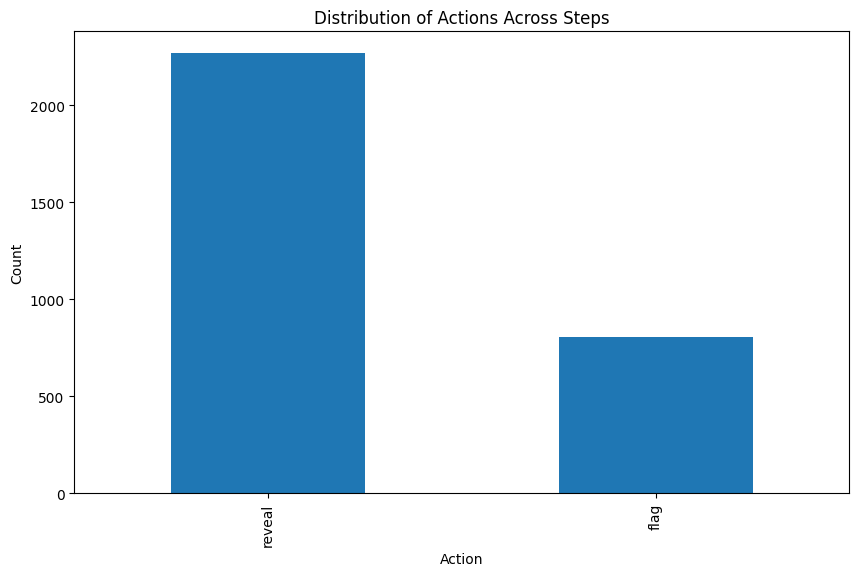

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Load GR Metrics
if not os.path.exists("gr_metrics.csv"):
    raise FileNotFoundError("gr_metrics.csv not found. Run simulations first.")

df_gr = pd.read_csv("gr_metrics.csv")

# Load Experience Data
if not os.path.exists("experience_data.json"):
    raise FileNotFoundError("experience_data.json not found. Run simulations first.")

with open("experience_data.json", "r") as f:
    experience_data = json.load(f)

# Extract outcomes from experience data
outcomes = [game["outcome"] for game in experience_data.get("5x5_5mines", [])]

results_df = pd.DataFrame({"Game_ID": range(1, len(outcomes) + 1), "Result": outcomes})

win_count = (results_df['Result'] == 'win').sum()
lose_count = (results_df['Result'] == 'lose').sum()
total_games = len(results_df)
win_ratio = win_count / total_games

print(f"Win/Loss Ratio:")
print(f"Wins: {win_count}, Losses: {lose_count}, Total: {total_games}")
print(f"Win Rate: {win_ratio*100:.2f}%")

# Plot Win/Loss distribution
results_df['Result'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Win/Loss Distribution")
plt.xlabel("Outcome")
plt.ylabel("Number of Games")
plt.show()

# Complexity and Entropy over time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Step')
ax1.set_ylabel('Complexity', color=color)
ax1.plot(df_gr['Step'], df_gr['Complexity'], color=color, label='Complexity')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Entropy', color=color)
ax2.plot(df_gr['Step'], df_gr['Entropy'], color=color, linestyle='--', label='Entropy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Complexity and Entropy Over Time")
plt.show()

# Entropy analysis
entropy_start = df_gr['Entropy'].iloc[0]
entropy_end = df_gr['Entropy'].iloc[-1]
print(f"Entropy at start: {entropy_start:.2f}")
print(f"Entropy at end: {entropy_end:.2f}")
if entropy_end < entropy_start:
    print("Entropy decreased over time, indicating increased certainty.")
else:
    print("Entropy did not decrease as expected, needs further analysis.")

# GR Value over time
plt.figure(figsize=(10, 6))
plt.plot(df_gr['Step'], df_gr['GR'], label='GR', color='green')
plt.title("GR Value Over Time")
plt.xlabel("Step")
plt.ylabel("GR")
plt.grid(True)
plt.legend()
plt.show()

# Detect significant GR changes
gr_diff = df_gr['GR'].diff().fillna(0)
large_changes = gr_diff.abs() > (df_gr['GR'].mean() * 0.5)
significant_changes = df_gr[large_changes]

if not significant_changes.empty:
    print("Significant GR changes at steps:")
    print(significant_changes[['Step', 'GR']])
else:
    print("No large sudden GR changes detected.")

# Summary Statistics Table
summary = {
    'Initial_Complexity': df_gr['Complexity'].iloc[0],
    'Final_Complexity': df_gr['Complexity'].iloc[-1],
    'Initial_Entropy': df_gr['Entropy'].iloc[0],
    'Final_Entropy': df_gr['Entropy'].iloc[-1],
    'Mean_GR': df_gr['GR'].mean(),
    'Max_GR': df_gr['GR'].max(),
    'Min_GR': df_gr['GR'].min(),
    'Win_Count': win_count,
    'Loss_Count': lose_count,
    'Win_Rate': win_ratio * 100
}

summary_df = pd.DataFrame([summary])
print("\nSummary Statistics:")
print(summary_df)

# Step-by-Step Experience Insights
steps_analysis = []
for game_id, game in enumerate(experience_data.get("5x5_5mines", []), start=1):
    for step_idx, step in enumerate(game["steps"]):
        action = step[1][0]
        row, col = step[1][1:]
        steps_analysis.append({
            "Game_ID": game_id,
            "Step": step_idx + 1,
            "Action": action,
            "Row": row,
            "Column": col
        })

steps_df = pd.DataFrame(steps_analysis)
print("\nStep-by-Step Analysis (First 10 rows):")
print(steps_df.head(10))

# Visualize Actions Distribution
plt.figure(figsize=(10, 6))
steps_df['Action'].value_counts().plot(kind='bar')
plt.title("Distribution of Actions Across Steps")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()